Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.



In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statistics import mode

%matplotlib inline

In [5]:
df = pd.read_csv(r"C:\Users\ramya\Downloads\archive (13)\amz_uk_price_prediction_dataset.csv")

df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [71]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

# Part 1: Understanding Product Categories

**Business Question:**
- What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

**Frequency Tables:**

- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?

**Visualizations:**

- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [10]:
product_frequency_table = df['category'].value_counts(ascending = False)
product_frequency_table

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: category, Length: 296, dtype: int64

In [25]:
product_frequency_table.head(15)

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Handmade Gifts                             18295
Handmade Home Décor                        18146
Luggage and travel gear                    18142
Handmade Jewellery                         18044
Handmade Artwork                           17878
Name: category, dtype: int64

In [17]:
# Top 5 categories 
product_frequency_table_top_5 = product_frequency_table[0:5]

In [14]:
product_frequency_table_top_5.index

Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts'],
      dtype='object')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(3, 0, 'Bath & Body'),
  Text(4, 0, 'Birthday Gifts')])

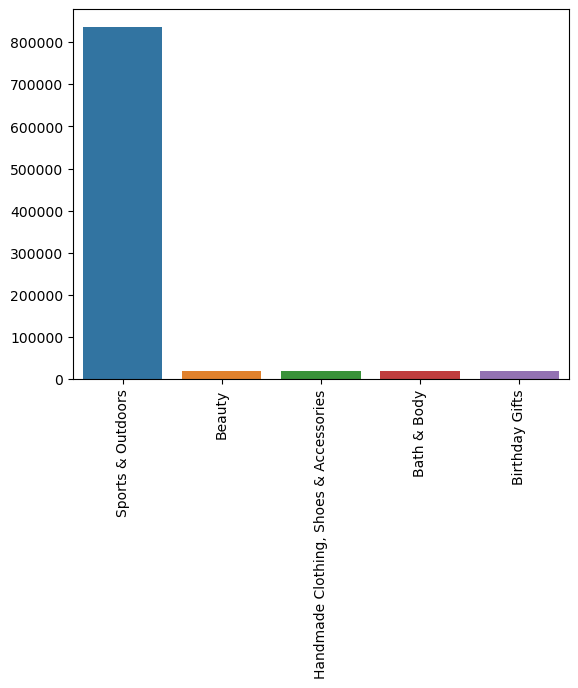

In [24]:
sns.barplot(x=product_frequency_table_top_5.index, y=product_frequency_table_top_5.values)
plt.xticks(rotation=90)


<AxesSubplot:ylabel='category'>

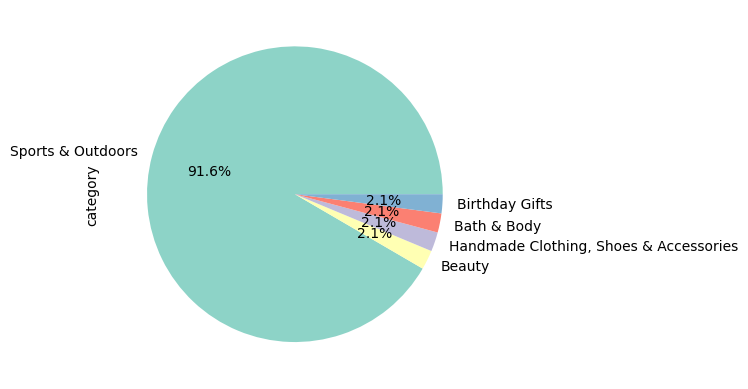

In [21]:
product_frequency_table_top_5.plot.pie(autopct='%1.1f%%', startangle=0, colors=sns.color_palette("Set3"))

# Part 2: Delving into Product Pricing
**Business Question:**
- How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

**Measures of Centrality:**

- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?

**Measures of Dispersion:**

- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

**Visualizations:**

- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [45]:
df['price'].agg(['mean','median',lambda x: mode(x)]).rename(index={'<lambda>': 'mode'})

mean      89.243809
median    19.090000
mode       9.990000
Name: price, dtype: float64

**the average price of products is much bigger than the most common price**

In [63]:
df['price'].describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [56]:
df['price'].var()

119445.48532256528

In [59]:
df['price'].std()

345.60886175352226

In [61]:
df_price_range = df['price'].max() - df['price'].min()
df_price_range

100000.0

In [67]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

interquartile_range = q3 - q1
interquartile_range

36.0

- Large Range, wide gap between the lowest and highest prices
- High Standard Deviationsuggests that prices vary a lot from the mean or average price.
- Large Interquartile Range which indicates a significant spread in the middle 50% of prices.
- Presence of Outliers can indicate a significant spread if they are present in the dataset.

<AxesSubplot:xlabel='price', ylabel='Count'>

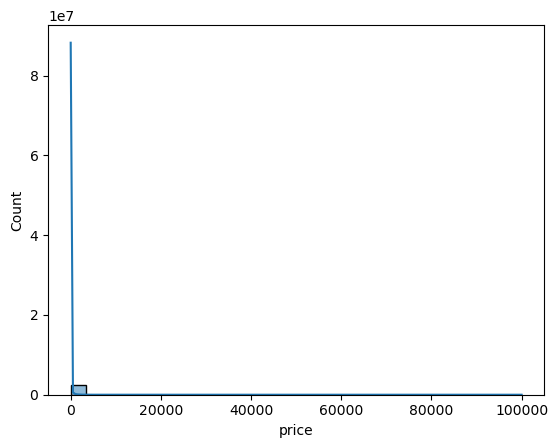

In [68]:
sns.histplot(df['price'], kde = True, bins = 30)

<AxesSubplot:>

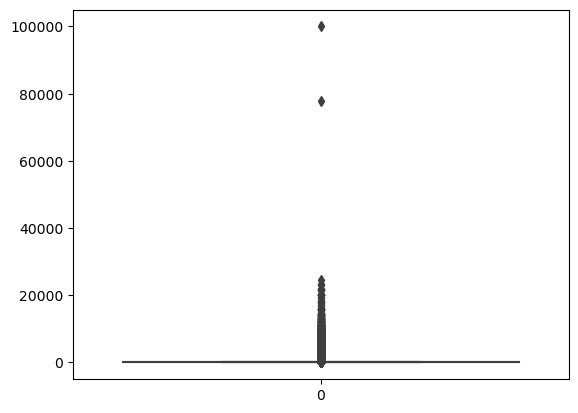

In [69]:
sns.boxplot(data= df['price'])

**Yes, there are products that are priced significantly higher than the rest**

# Part 3: Unpacking Product Ratings
**Business Question:** 
How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

**Measures of Centrality:**

- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

**Measures of Dispersion:**

- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

**Shape of the Distribution:**

- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

**Visualizations:**

- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [70]:
df['stars'].agg(['mean','median',lambda x: mode(x)]).rename(index={'<lambda>': 'mode'})

mean      2.152836
median    0.000000
mode      0.000000
Name: stars, dtype: float64

In [73]:
df['stars'].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

- **customers mostly rate the products by zero**

In [75]:
df['stars'].var()

4.81743402976196

In [76]:
df['stars'].std()

2.1948653785054697

In [77]:
q1 = df['stars'].quantile(0.25)
q3 = df['stars'].quantile(0.75)

interquartile_range = q3 - q1
interquartile_range

4.4

In [80]:
stars_skewness = df['stars'].skew()
stars_skewness

0.08120735761080985

- **+ve meaning it's right skewed and the mean > mode, tail towards higher values**

In [83]:
stars_kutosis = df['stars'].kurtosis()
stars_kutosis

-1.9260061280432985

<AxesSubplot:xlabel='stars', ylabel='Count'>

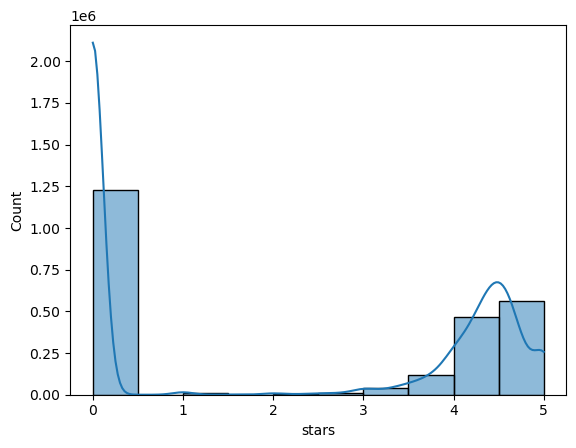

In [84]:
sns.histplot(df['stars'], kde = True, bins = 10)